# Interior and Exterior Representations

Let's first have a look at Minkowski's theorem:
#### Minkowski's Theorem
$\forall A \>\> \exists B$ and $\forall B \>\> \exists A$:<br>
$P(A,0)=cone(B)$

This theorem can be extended from polyhedral cones to general polyhedra:
#### Representation Theorem
$\forall A,b \>\> \exists V,E: P(A,b) = conv(V) + cone(E)$<br>

The above yield the definitions of interior and exterior representations of polyhedra:
#### Exterior Representation
A polyhedron is the intersaction of halfspaces: $P(A,b)=\cap_i\{x: A_{i\bullet} x \leq b_i\}$.
#### Interior Representation
A polyhedron is the sum of its vertices (convex hull) plus its extreme rays (conic hull): $P = conv(V) + cone(E)$

# Interior $\rightarrow$ Exterior 

This section describes a method on how to observe the exterior representation of a polyhedron, given its interior representation.

Lets look at an example:<br><br>
Consider a set of vertices $V:=\{\}$ and a set of extreme rays $E:=\{\}$.
Then, $P=conv(V)+cone(E)$ looks like this:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
vertices = np.matrix('0 0; 1 2; 1.75 1.75; 2 1; 0 0')
vertices[:, 0]

matrix([[0.  ],
        [1.  ],
        [1.75],
        [2.  ],
        [0.  ]])

In [3]:
rays = np.matrix('3 2; 2 3')

[[0. 0.]]
[[1. 2.]]
[[1.75 1.75]]
[[2. 1.]]
[[0. 0.]]


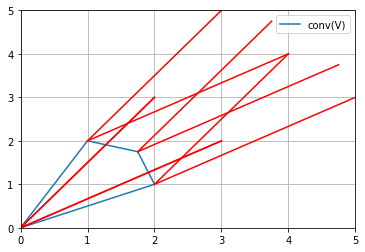

In [11]:
plt.figure()
plt.grid()
plt.plot(vertices[:, 0], vertices[:, 1], label="conv(V)")
for v in range(vertices.shape[0]):
    print(vertices[v])
    for r in range(rays.shape[0]):
        plt.plot([vertices[v, 0], vertices[v, 0]+rays[r, 0]],
                 [vertices[v, 1], vertices[v, 1] + rays[r, 1]],
                 color='red')
plt.xlim((0, 5))
plt.ylim((0, 5))
plt.legend()
plt.show()

Given the interior representation $P = conv(\{v^1,...,v^k\} + cone(\{r^1,...,r^l\})$, we can obtain the exterior representation using the following procedure:
<br><br>
1. Take any arbitrary point $x$ from $P$. We have:
<br><br>
$
\begin{equation}
    \begin{array}{ll@{}ll}
    \displaystyle \>\>\>\> x & = \>\> \sum_{i=1}^k \lambda_i  v_i + \sum_{i=1}^l \mu_i r_i &\\
    \displaystyle \sum_{i=1}^k \lambda_i & = \>\> 1 &\\
    \lambda_i & \geq \>\> 0 \>\> (i=1,...,k) &\\
    \mu_i & \geq \>\> 0 \>\> (i=1,...,l) &\\
    \end{array}
\end{equation}
$
<br><br>
2. These equalities and inequalities can all be summed up in a single sytem of linear inequalities:
<br><br>
$\tilde A x \leq \tilde b$
<br><br>
3. Then we can use the [Fourier-Motzkin-Elimination](Fourier-Motzkin-Elimination.ipynb) to project out all the variables $\lambda_i$ and $\mu_i$ and obtain the exterior description of our polyhedron:
<br><br>
$Ax\leq b$

# Exterior $\rightarrow$ Interior

So how can we go the other way round and obtain the interior description from the exterior?
<br><br>
Here is how:
<br><br>
1. Convert the exterior description $P(A,b)$ of the polyhedron to the exterior description of a polyhedral cone $C = P(A,0)$. Have a look at [this](Affine-Mappings-and-Polar-Cones.ipynb) notebook for details on that.
<br><br>
2. For $C$, we know that a matrix $B$ exists, such that $C=cone(B)$. We can construct this matrix from the exterior description of $C$ using the [Fourier-Motzkin-Elimination](Fourier-Motzkin-Elimination.ipynb).
<br><br>
3. Then we can scale the inner description $B$ of $C$ and read off the interior description of tbe original polyhedron.